# **Weather Prediction using ML**

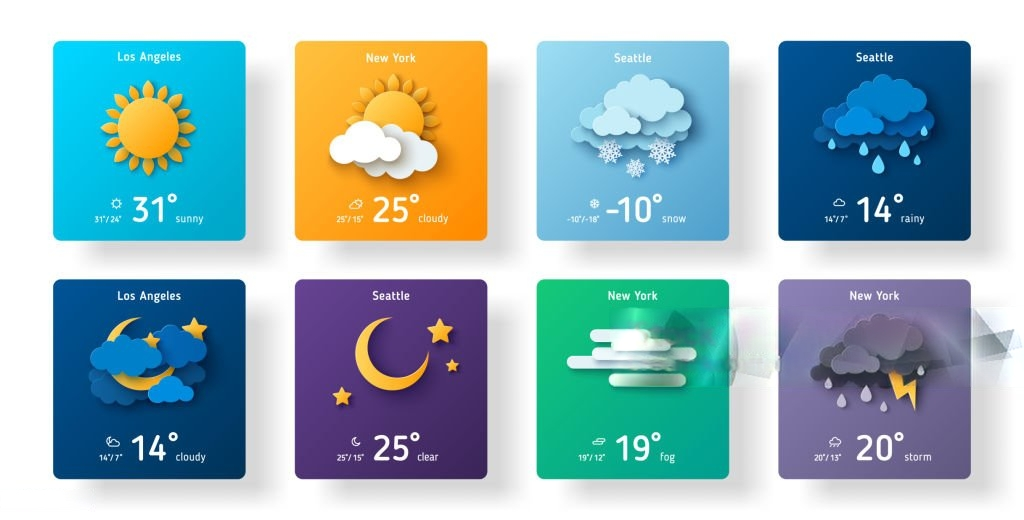

# Overview of the Project

The Project focuses on weather prediction using machine learning, with the primary goal of predicting the weather summary based on various meteorological parameters. The dataset using contains historical weather data from 2017 to 2024, including attributes such as temperature, humidity, wind speed, pressure, visibility, cloud cover, and precipitation type. The target variable, "Summary", represents the general weather condition (e.g., "Partly Cloudy", "Mostly Cloudy", "Rain", etc.).

#Objective of the Project

The objective of this project is to develop a machine learning model that can accurately classify the weather condition based on historical weather patterns. This involves exploring relationships between different weather features, handling missing data, feature engineering, and applying classification algorithms to predict the weather summary for future timestamps. The insights derived from this model can be valuable for meteorological forecasting, agriculture, disaster management, and other weather-dependent industries.

#Features :
THERE ARE 10 FEATURES AND 1 TARGET VARIABLE.

1) Formatted Date – The timestamp indicating when the weather data was recorded.

2)Precip Type-The type of precipitation observed, such as rain or snow.

3)Temperature (C) – The actual air temperature in degrees Celsius.

4)Apparent Temperature (C) – The perceived temperature considering wind and humidity.

5)Humidity – The relative humidity level as a fraction between 0 and 1.

6)Wind Speed (km/h) – The speed of the wind at the time of observation in kilometers per hour.

7)Wind Bearing (degrees) – The direction of the wind in degrees (0° is North, 90° is East, etc.).

8)Visibility (km) – The distance one can see clearly in kilometers.

9)Cloud Cover – The fraction of the sky covered by clouds (0 to 1).

10)Pressure (millibars) – The atmospheric pressure measured in millibars.

#Target Variable
Summary – A brief description of the weather conditions (e.g., "Partly Cloudy").

#Project code starts from here

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv("/content/Weather_History_2017-2024.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96451 entries, 0 to 96450
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96451 non-null  object 
 1   Summary                   96451 non-null  object 
 2   Precip Type               95934 non-null  object 
 3   Temperature (C)           96451 non-null  float64
 4   Apparent Temperature (C)  96451 non-null  float64
 5   Humidity                  96451 non-null  float64
 6   Wind Speed (km/h)         96451 non-null  float64
 7   Wind Bearing (degrees)    96451 non-null  int64  
 8   Visibility (km)           96451 non-null  float64
 9   Cloud Cover               96451 non-null  int64  
 10  Pressure (millibars)      96451 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 8.1+ MB


In [ ]:
data.describe()

Temperature (C)  Apparent Temperature (C)      Humidity  \
count     96451.000000              96451.000000  96451.000000   
mean         11.932425                 10.854762      0.734909   
std           9.551473                 10.696791      0.195462   
min         -21.822222                -27.716667      0.000000   
25%           4.688889                  2.311111      0.600000   
50%          12.000000                 12.000000      0.780000   
75%          18.838889                 18.838889      0.890000   
max          39.905556                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
count       96451.000000            96451.000000     96451.000000   
mean           10.810096              187.509077        10.347333   
std             6.912596              107.384341         4.192166   
min             0.000000                0.000000         0.000000   
25%             5.828200              116.000000         8.339800   
50%             9.965900              180.000000        10.046400   
75%            14.135800              290.000000        14.812000   
max            63.852600              359.000000        16.100000   

       Cloud Cover  Pressure (millibars)  
count      96451.0          96451.000000  
mean           0.0           1003.235590  
std            0.0            116.971091  
min            0.0              0.000000  
25%            0.0           1011.900000  
50%            0.0           1016.440000  
75%            0.0           1021.090000  
max            0.0           1046.380000

In [ ]:
data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Cloud Cover                   0
Pressure (millibars)          0
dtype: int64

Changed the data into a dataframe

In [ ]:
df=pd.DataFrame(data)

In [ ]:
df

Formatted Date        Summary Precip Type  \
0      2022-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2022-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2022-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2022-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2022-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96446  2024-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96447  2024-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96448  2024-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96449  2024-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96450  2024-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0             9.472222                  7.388889      0.89            14.1197   
1             9.355556                  7.227778      0.86            14.2646   
2             9.377778                  9.377778      0.89             3.9284   
3             8.288889                  5.944444      0.83            14.1036   
4             8.755556                  6.977778      0.83            11.0446   
...                ...                       ...       ...                ...   
96446        26.016667                 26.016667      0.43            10.9963   
96447        24.583333                 24.583333      0.48            10.0947   
96448        22.038889                 22.038889      0.56             8.9838   
96449        21.522222                 21.522222      0.60            10.5294   
96450        20.438889                 20.438889      0.61             5.8765   

       Wind Bearing (degrees)  Visibility (km)  Cloud Cover  \
0                         251          15.8263            0   
1                         259          15.8263            0   
2                         204          14.9569            0   
3                         269          15.8263            0   
4                         259          15.8263            0   
...                       ...              ...          ...   
96446                      31          16.1000            0   
96447                      20          15.5526            0   
96448                      30          16.1000            0   
96449                      20          16.1000            0   
96450                      39          15.5204            0   

       Pressure (millibars)  
0                   1015.13  
1                   1015.63  
2                   1015.94  
3                   1016.41  
4                   1016.51  
...                     ...  
96446               1014.36  
96447               1015.16  
96448               1015.66  
96449               1015.95  
96450               1016.16  

[96451 rows x 11 columns]

Find the mode value of "precip type" coloumn. Because the coloumn has categorical values

In [ ]:
mode=df["Precip Type"].mode()[0]

Fill the mode value to the coloumn using "fillna" function




In [ ]:
df["Precip Type"]=df["Precip Type"].fillna(mode)

Find is there any null values still present in the coloumn

In [ ]:
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Cloud Cover                 0
Pressure (millibars)        0
dtype: int64

In [ ]:
import seaborn as sns

<Axes: ylabel='Temperature (C)'>

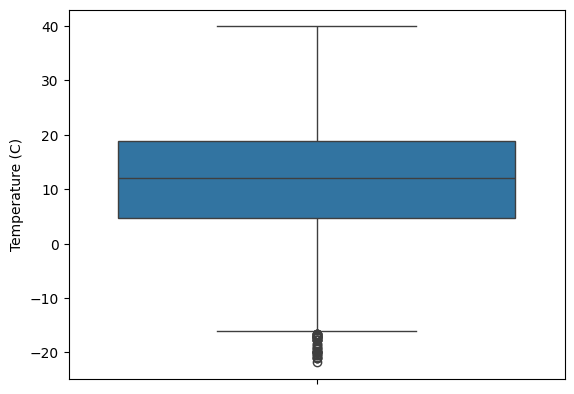

In [ ]:
sns.boxplot(df["Temperature (C)"])

<Axes: ylabel='Apparent Temperature (C)'>

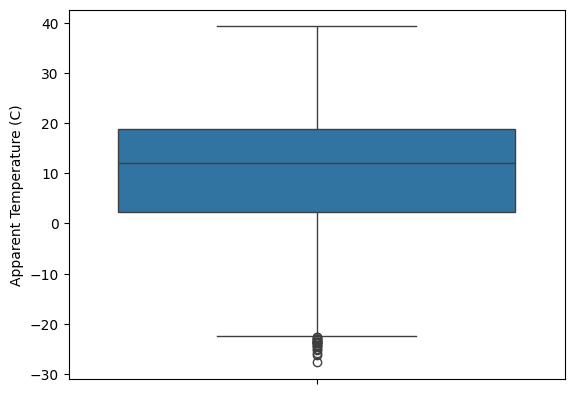

In [ ]:
sns.boxplot(df["Apparent Temperature (C)"])

<Axes: ylabel='Humidity'>

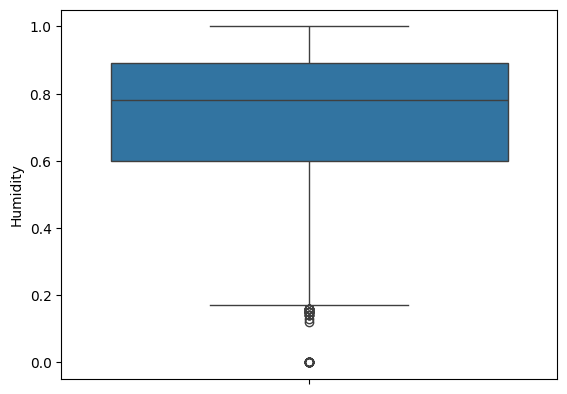

In [ ]:
sns.boxplot(df["Humidity"])

<Axes: ylabel='Wind Speed (km/h)'>

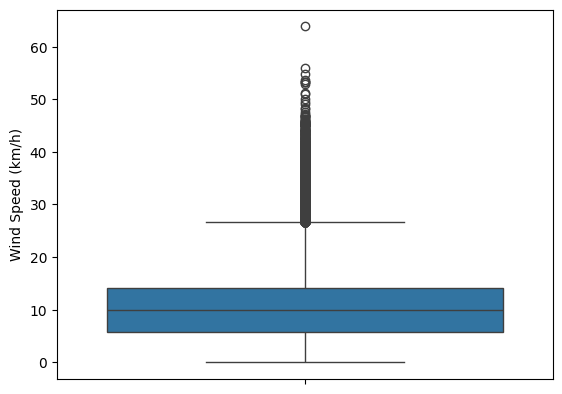

In [ ]:
sns.boxplot(df["Wind Speed (km/h)"])

<Axes: ylabel='Wind Bearing (degrees)'>

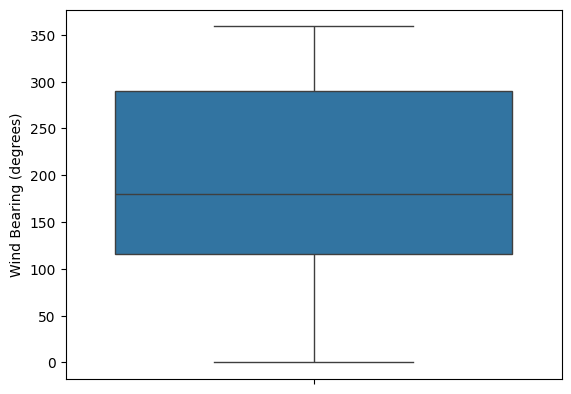

In [ ]:
sns.boxplot(df["Wind Bearing (degrees)"])

<Axes: ylabel='Visibility (km)'>

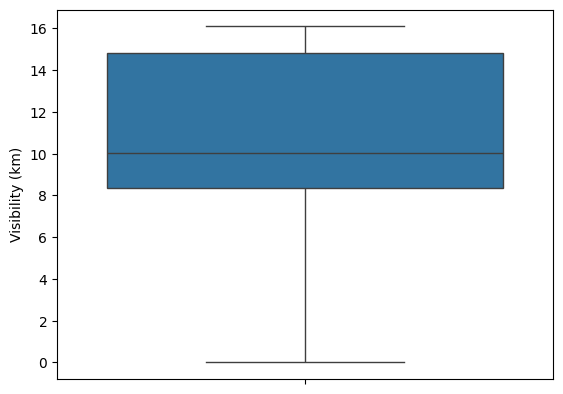

In [ ]:
sns.boxplot(df["Visibility (km)"])

<Axes: ylabel='Pressure (millibars)'>

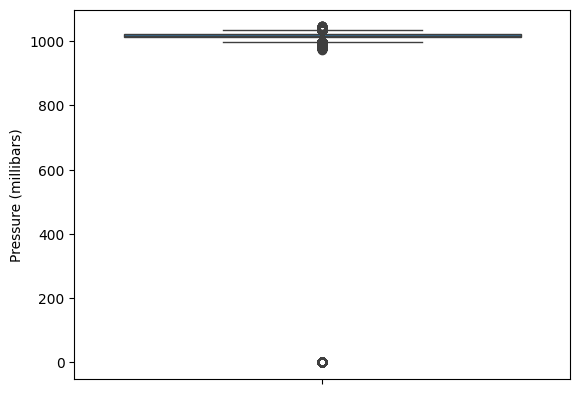

In [ ]:
sns.boxplot(df["Pressure (millibars)"])

In [ ]:
import numpy as np

# Compute IQR
Q1 = df["Wind Speed (km/h)"].quantile(0.25)
Q3 = df["Wind Speed (km/h)"].quantile(0.75)
IQR = Q3 - Q1

# Compute Outlier Thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the Median
median_1 = df["Wind Speed (km/h)"].median()

# Replace ONLY Outliers, Keep Other Values Unchanged
df.loc[(df["Wind Speed (km/h)"] < lower_bound) | (df["Wind Speed (km/h)"] > upper_bound), "Wind Speed (km/h)"] = median_1




<Axes: ylabel='Wind Speed (km/h)'>

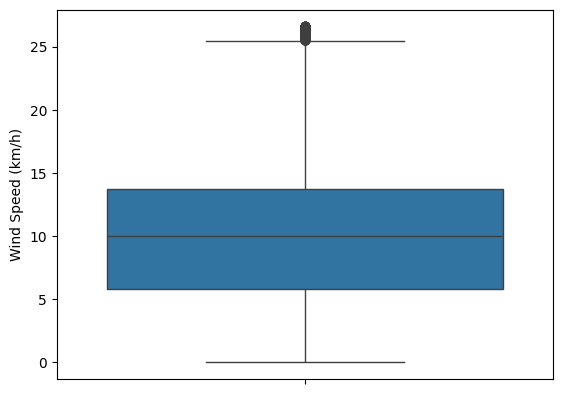

In [ ]:
sns.boxplot(df["Wind Speed (km/h)"])

In [ ]:
import numpy as np

# Compute IQR
Q1 = df["Pressure (millibars)"].quantile(0.25)
Q3 = df["Pressure (millibars)"].quantile(0.75)
IQR = Q3 - Q1

# Compute Outlier Thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the Median
median = df["Pressure (millibars)"].median()

# Replace ONLY Outliers, Keep Other Values Unchanged
df.loc[(df["Pressure (millibars)"] < lower_bound) | (df["Pressure (millibars)"] > upper_bound), "Pressure (millibars)"] = median




<Axes: ylabel='Pressure (millibars)'>

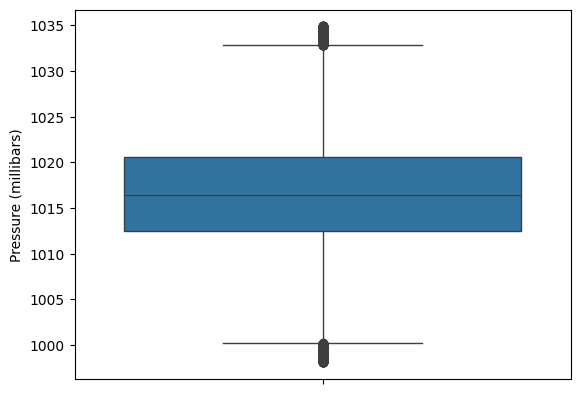

In [ ]:
sns.boxplot(df["Pressure (millibars)"])

In [ ]:
import numpy as np

# Compute IQR
Q1 = df["Humidity"].quantile(0.25)
Q3 = df["Humidity"].quantile(0.75)
IQR = Q3 - Q1

# Compute Outlier Thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the Median
median_3 = df["Humidity"].median()

# Replace ONLY Outliers, Keep Other Values Unchanged
df.loc[(df["Humidity"] < lower_bound) | (df["Humidity"] > upper_bound), "Humidity"] = median_3




<Axes: ylabel='Humidity'>

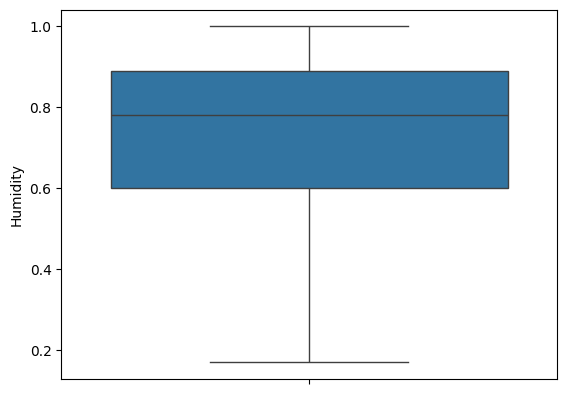

In [ ]:
sns.boxplot(df["Humidity"])

In [ ]:
import numpy as np

# Compute IQR
Q1 = df["Temperature (C)"].quantile(0.25)
Q3 = df["Temperature (C)"].quantile(0.75)
IQR = Q3 - Q1

# Compute Outlier Thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the Median
median_4 = df["Temperature (C)"].median()

# Replace ONLY Outliers, Keep Other Values Unchanged
df.loc[(df["Temperature (C)"] < lower_bound) | (df["Temperature (C)"] > upper_bound), "Temperature (C)"] = median_4

<Axes: ylabel='Temperature (C)'>

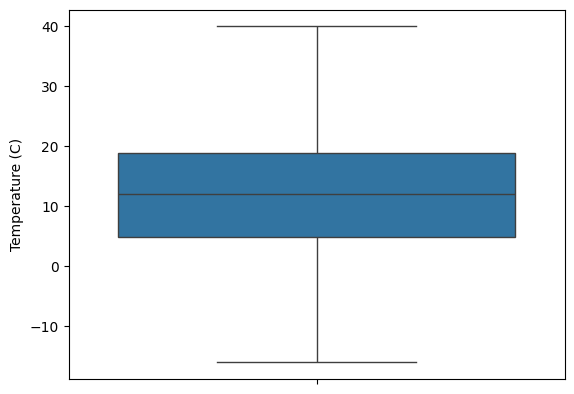

In [ ]:
sns.boxplot(df["Temperature (C)"])

In [ ]:
import pandas as pd

# Compute correlation
corr = df["Temperature (C)"].corr(df["Apparent Temperature (C)"])
print(f"Correlation: {corr}")


Correlation: 0.9905762612492348


Since temperature and apparent temperature are highly correlated. I remove apparent temperature. Because temperature is directly measured and apparent tempearature is measured from other features like wind speed and humidity etc which already exist in the data.

In [ ]:
df=df.drop(["Apparent Temperature (C)","Cloud Cover"],axis=1)


<Axes: xlabel='Temperature (C)', ylabel='Count'>

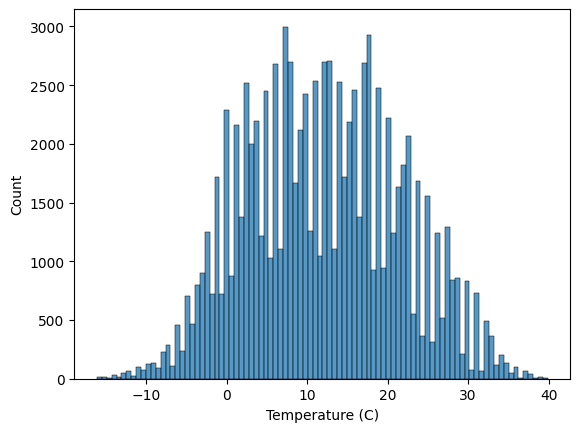

In [ ]:
sns.histplot(df["Temperature (C)"])

<Axes: xlabel='Humidity', ylabel='Count'>

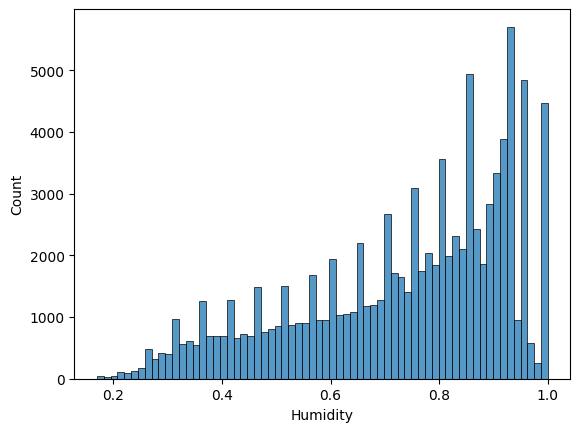

In [ ]:
sns.histplot(df['Humidity'])

<Axes: xlabel='Wind Speed (km/h)', ylabel='Count'>

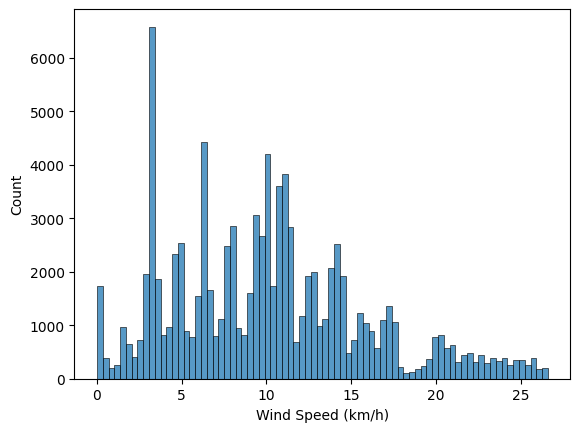

In [ ]:
 sns.histplot(df['Wind Speed (km/h)'])

<Axes: xlabel='Pressure (millibars)', ylabel='Count'>

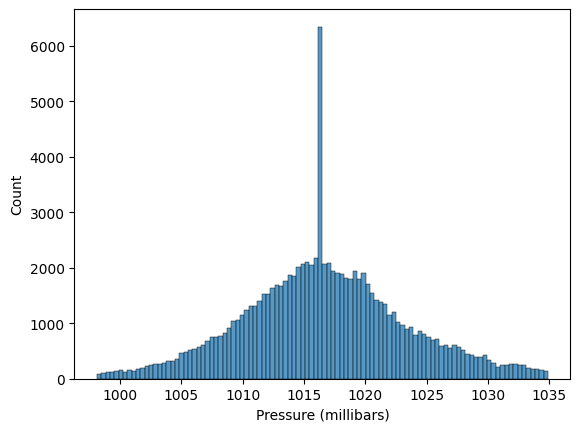

In [ ]:
sns.histplot(df["Pressure (millibars)"])

Regarding skewness values.

1.If skewness value is equal to zero- Considering it as Normal distribution

2.if skewness greater than zero- considering it as positive skew or right skew

3. If skewness less than zero- considering it as negative skew or left skew

4. if skewness greater than 1 or -1 -- considering it as highly skewed and needs transformation

In [ ]:
skewness_values=df['Temperature (C)'].skew()
print(skewness_values)

0.10562642930241609


Skewness value of Temperature suggests it is slightly right skewed which is considered as almost normal distribution. Hence no action needs to done to transform this column.

In [ ]:
skewness_values_1=df["Pressure (millibars)"].skew()
print(skewness_values_1)

0.09905726385568343


Same with the case of Pressure also(Slightly right skewed). Hence no action needs to done to transform this column.

In [ ]:
skewness_values_2=df["Humidity"].skew()
print(skewness_values_2)

-0.7079022431930857


In case of humidity, the value suggests it is a moderate left skewed. So needs transformation.

So square transformation is using for Humidity.

In [ ]:
df["Humidity"] = np.square(df["Humidity"])  # Square transformation


In [ ]:
skewness_values_4=df['Wind Speed (km/h)'].skew()
print(skewness_values_4)

0.591318909168316


In case of Windspeed, the value suggests it is a moderate Right skewed. So needs transformation.

So uses squareroot transformation for wind speed

In [ ]:
df['Wind Speed (km/h)'] = np.sqrt(df['Wind Speed (km/h)'])  # Square root transformation


#Checking Skewness

In [ ]:
skewness_values_4=df['Wind Speed (km/h)'].skew()
print(skewness_values_4)

-0.35157546874794315


In [ ]:
skewness_values_2=df["Humidity"].skew()
print(skewness_values_2)

-0.29329485184118936


#Count plot of Summary

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-42-9868c578685c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Summary"], palette="coolwarm")


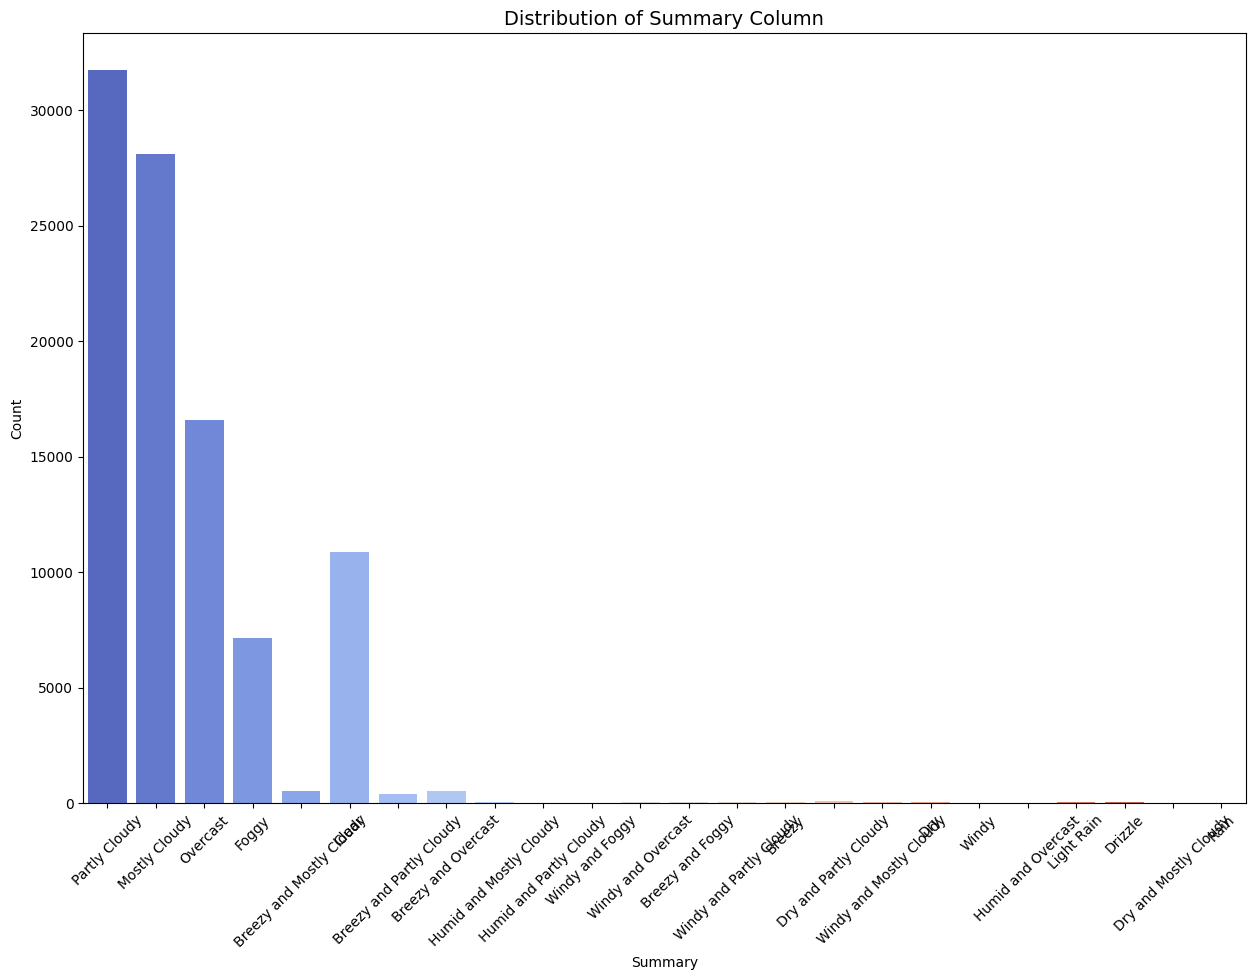

In [ ]:
# Create a countplot for the 'summary' column
plt.figure(figsize=(15, 10))
sns.countplot(x=df["Summary"], palette="coolwarm")

# Set labels and title
plt.title("Distribution of Summary Column", fontsize=14)
plt.xlabel("Summary")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x labels if needed

# Show the plot
plt.show()

In [ ]:
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns

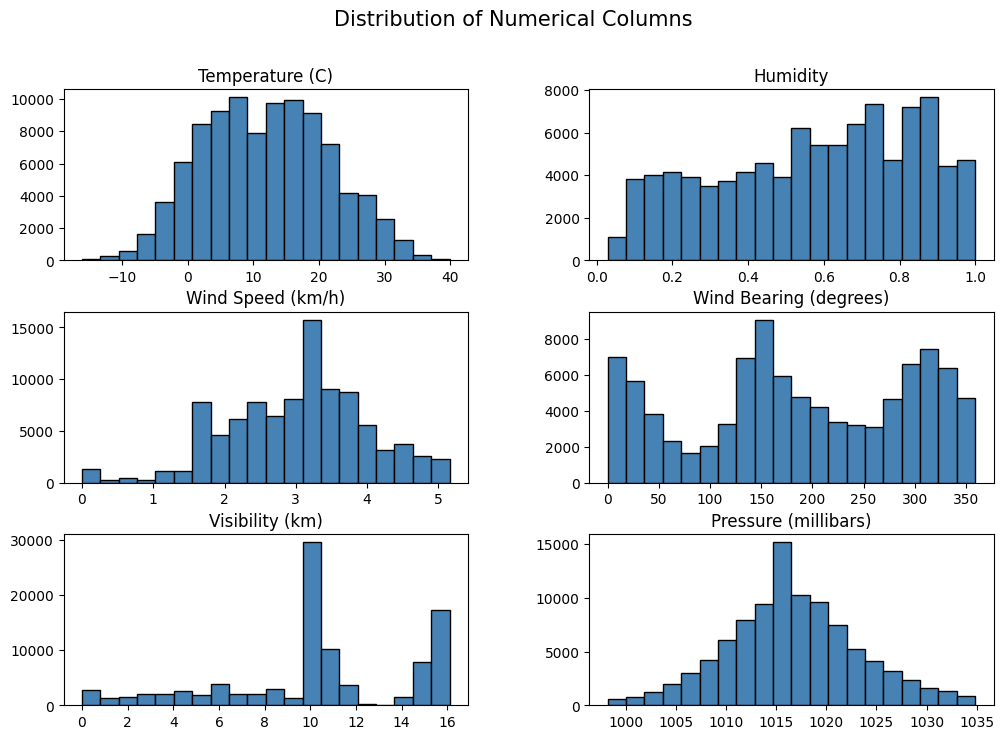

In [ ]:
df[numerical_cols].hist(figsize=(12, 8), bins=20, grid=False, color="steelblue", edgecolor="black")
plt.suptitle("Distribution of Numerical Columns", fontsize=15)
plt.show()

<ipython-input-45-38baae32d672>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Summary", y="Temperature (C)", data=df, palette="coolwarm")


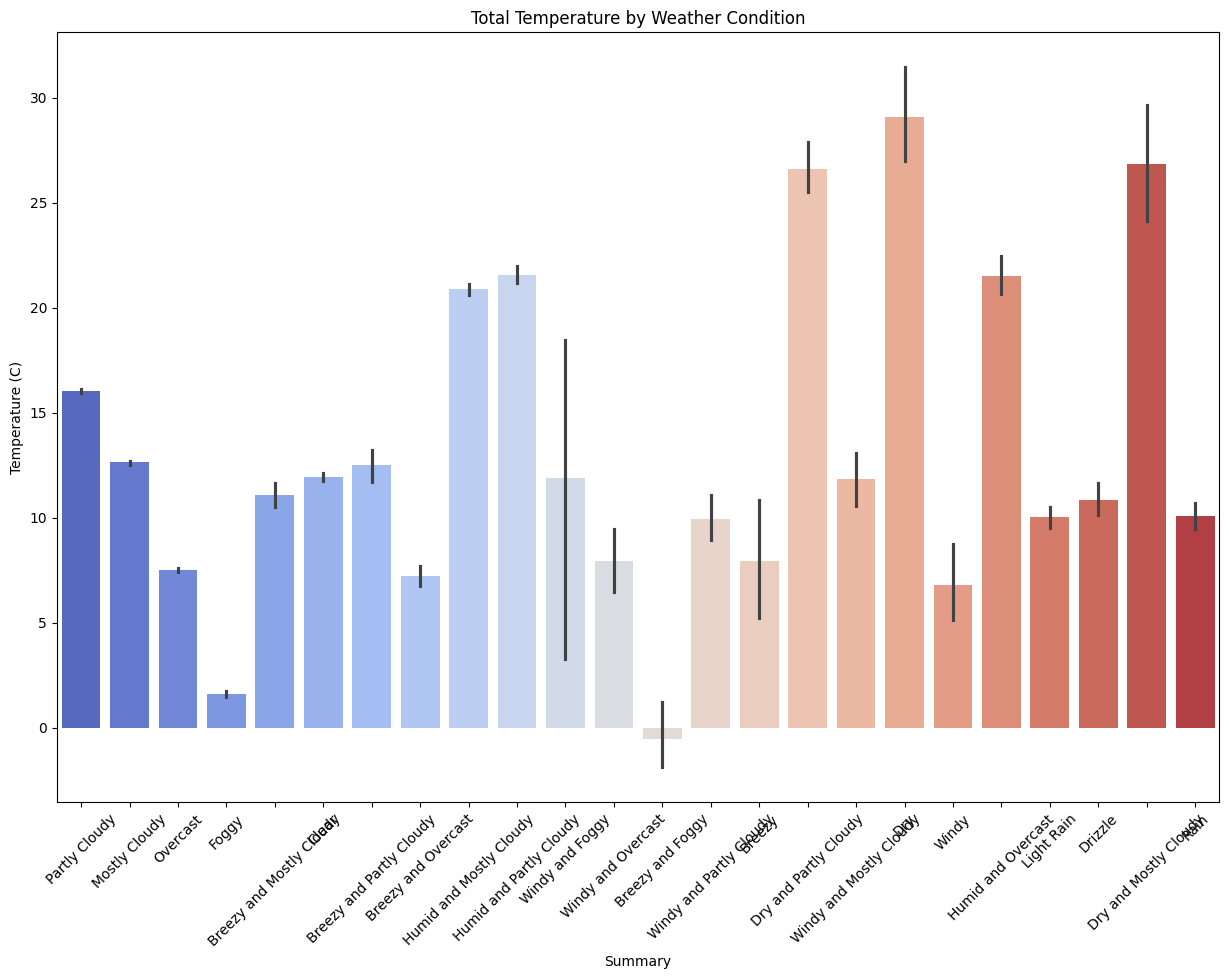

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Summary", y="Temperature (C)", data=df, palette="coolwarm")
plt.title("Total Temperature by Weather Condition")
plt.xticks(rotation=45)
plt.show()

<ipython-input-46-4e4c74eb35d9>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="Temperature (C)", y="Humidity", data=df, palette="coolwarm", size=5)


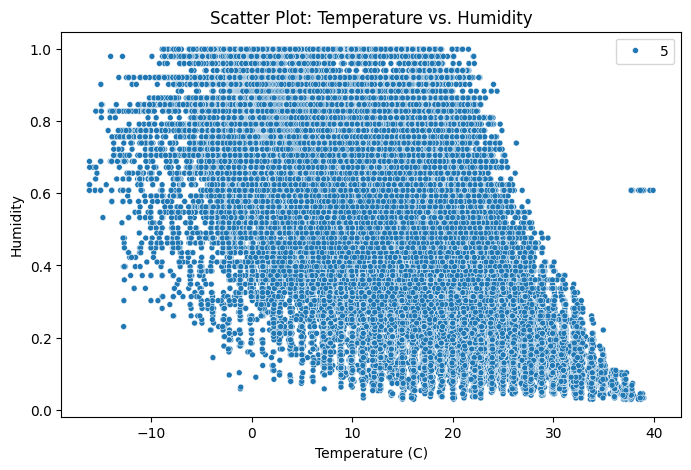

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Temperature (C)", y="Humidity", data=df, palette="coolwarm", size=5)
plt.title("Scatter Plot: Temperature vs. Humidity")
plt.show()


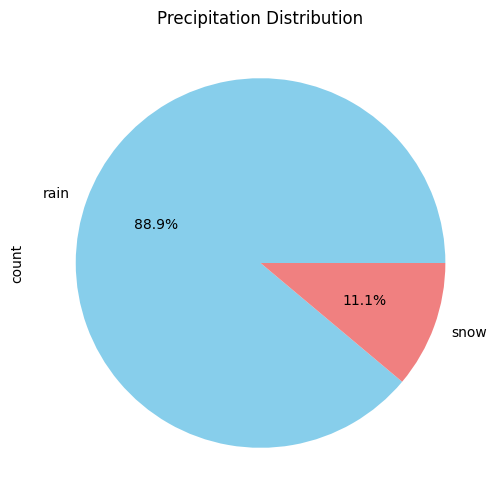

In [ ]:
plt.figure(figsize=(6, 6))
df["Precip Type"].value_counts().plot.pie(autopct="%1.1f%%", colors=["skyblue", "lightcoral", "lightgreen"])
plt.title("Precipitation Distribution")
plt.show()

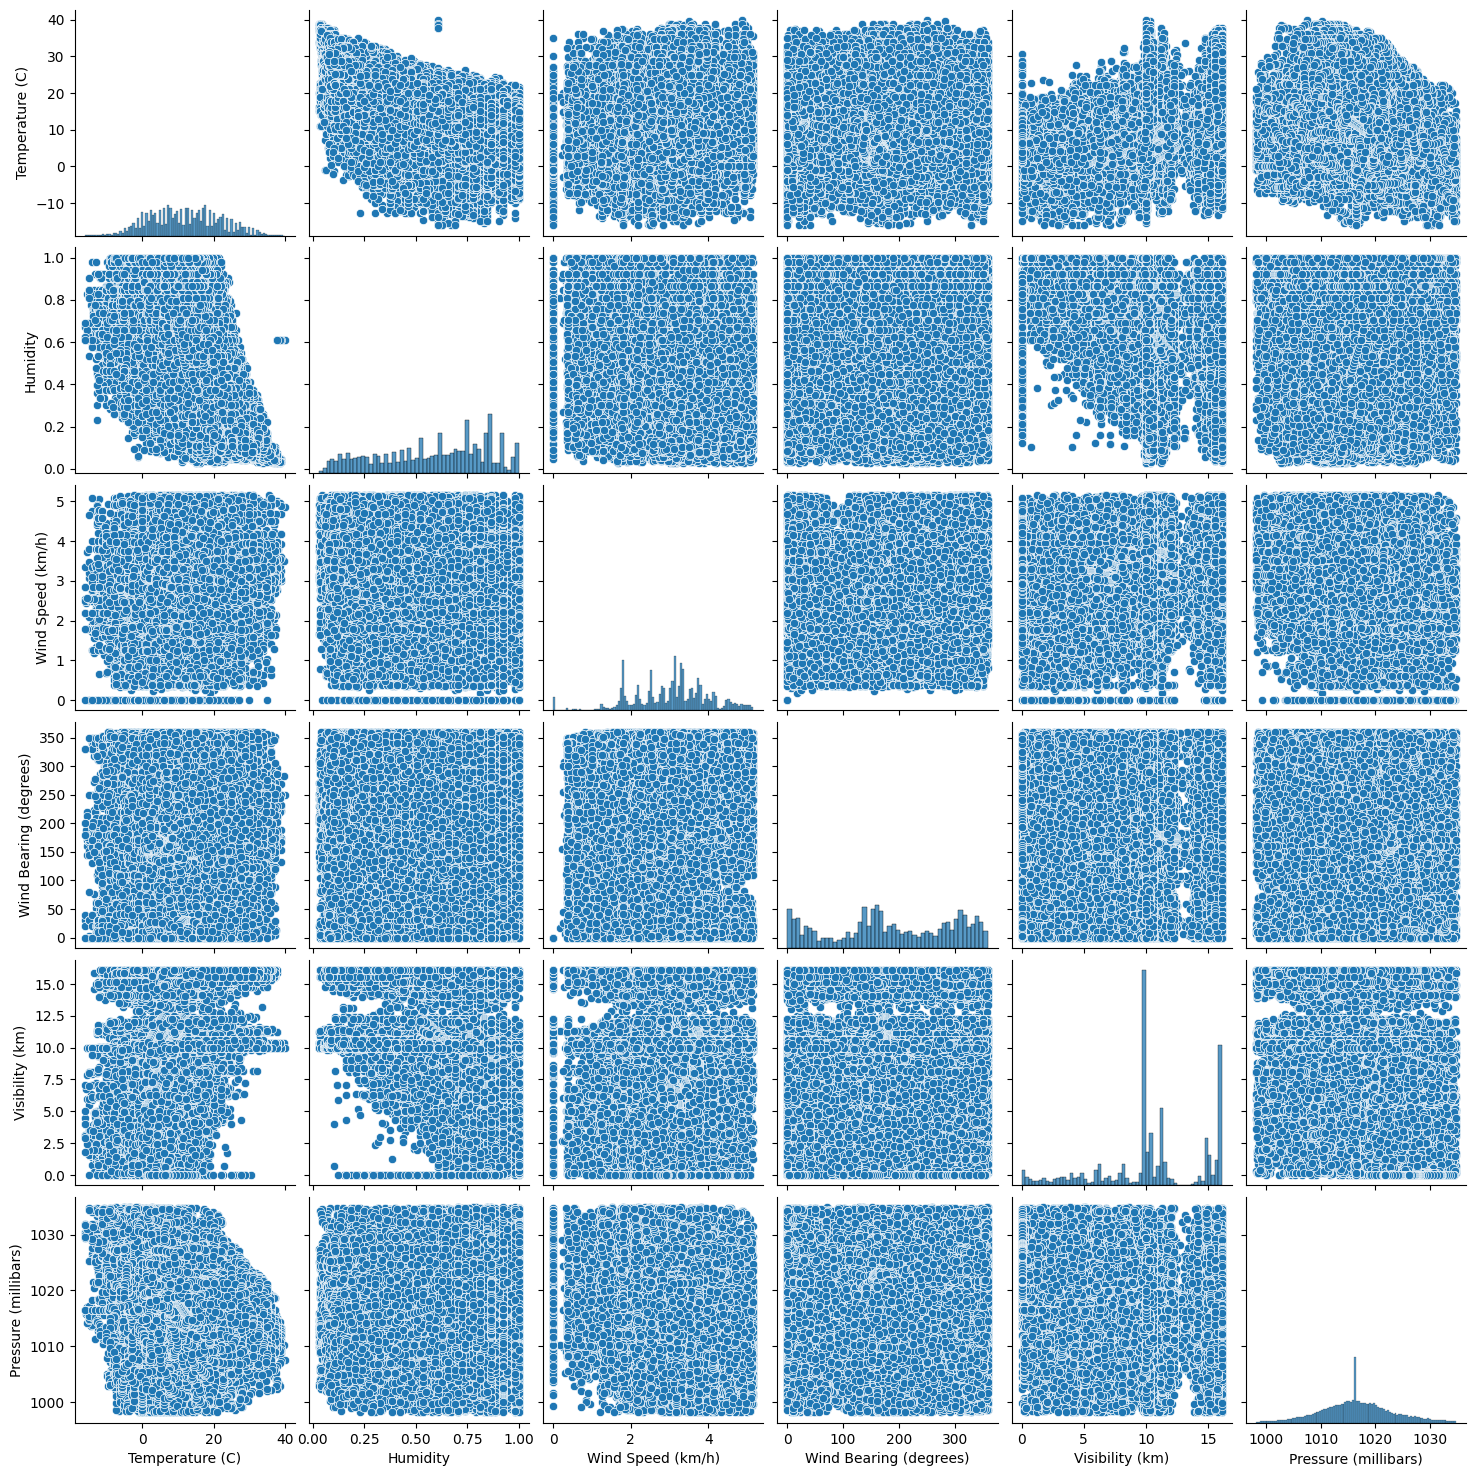

In [ ]:
sns.pairplot(df)
plt.show()


<ipython-input-49-2dfed5c33a04>:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df["Formatted Date"] = pd.to_datetime(df["Formatted Date"], errors='coerce')


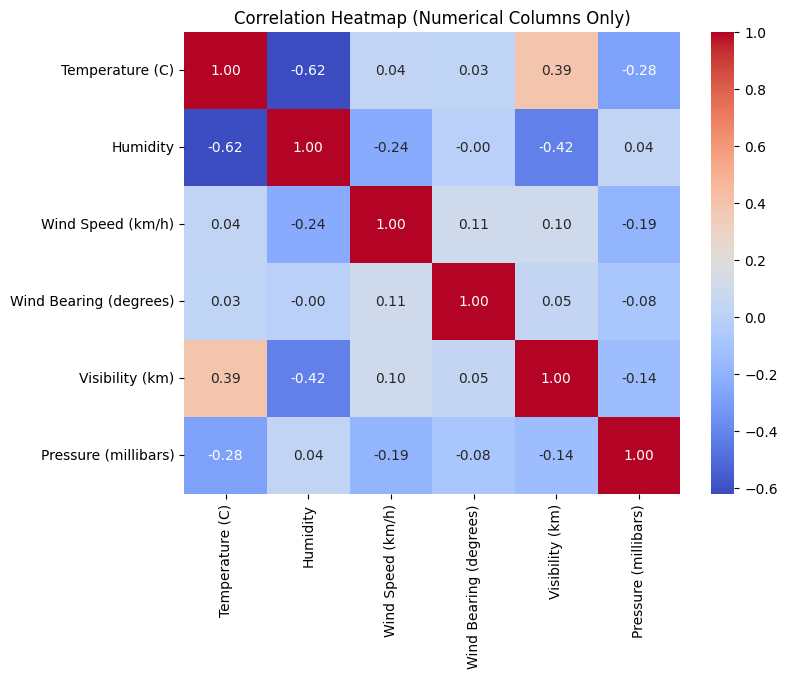

In [ ]:

# Convert all non-numeric columns to datetime (if necessary)
df["Formatted Date"] = pd.to_datetime(df["Formatted Date"], errors='coerce')

# Select only numerical columns
df_numeric = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Columns Only)")
plt.show()


<ipython-input-50-477e5ac696ec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Humidity", y="Precip Type", data=df, palette="coolwarm")


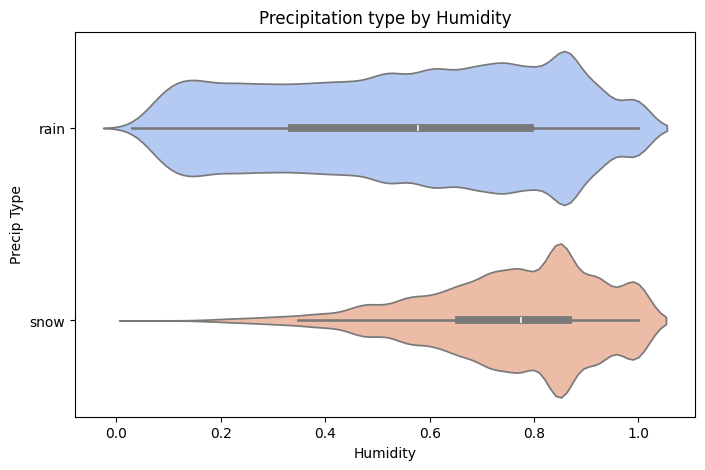

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(x="Humidity", y="Precip Type", data=df, palette="coolwarm")
plt.title("Precipitation type by Humidity")
plt.show()


Feature encoding- 2 types-Label encoding and One hot encoding
Label encoding mainly used when target variables has discrete categories and it assigns a number to each category
One hot encoding is mainly used when target column has no natural order

In [ ]:
# Feature Engineering: Encoding categorical features
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

label_encoders = {}
for col in ["Summary"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# One-Hot Encoding for 'Precip Type'
df = pd.get_dummies(df, columns=["Precip Type"], drop_first=True,dtype="int")

In [ ]:
df

Formatted Date  Summary  Temperature (C)  Humidity  \
0      2022-04-01 00:00:00+02:00       17         9.472222    0.7921   
1      2022-04-01 01:00:00+02:00       17         9.355556    0.7396   
2      2022-04-01 02:00:00+02:00       15         9.377778    0.7921   
3      2022-04-01 03:00:00+02:00       17         8.288889    0.6889   
4      2022-04-01 04:00:00+02:00       15         8.755556    0.6889   
...                          ...      ...              ...       ...   
96446  2024-09-09 19:00:00+02:00       17        26.016667    0.1849   
96447  2024-09-09 20:00:00+02:00       17        24.583333    0.2304   
96448  2024-09-09 21:00:00+02:00       17        22.038889    0.3136   
96449  2024-09-09 22:00:00+02:00       17        21.522222    0.3600   
96450  2024-09-09 23:00:00+02:00       17        20.438889    0.3721   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
0               3.757619                     251          15.8263   
1               3.776851                     259          15.8263   
2               1.982019                     204          14.9569   
3               3.755476                     269          15.8263   
4               3.323342                     259          15.8263   
...                  ...                     ...              ...   
96446           3.316067                      31          16.1000   
96447           3.177216                      20          15.5526   
96448           2.997299                      30          16.1000   
96449           3.244904                      20          16.1000   
96450           2.424149                      39          15.5204   

       Pressure (millibars)  Precip Type_snow  
0                   1015.13                 0  
1                   1015.63                 0  
2                   1015.94                 0  
3                   1016.41                 0  
4                   1016.51                 0  
...                     ...               ...  
96446               1014.36                 0  
96447               1015.16                 0  
96448               1015.66                 0  
96449               1015.95                 0  
96450               1016.16                 0  

[96451 rows x 9 columns]

Converting date into numerical features like year,month,day,hour etc

In [ ]:
# Convert 'Formatted Date' to datetime format
df["Formatted Date"] = pd.to_datetime(df["Formatted Date"], utc=True)

# Extract useful date components
df["Year"] = df["Formatted Date"].dt.year
df["Month"] = df["Formatted Date"].dt.month
df["Day"] = df["Formatted Date"].dt.day
df["Hour"] = df["Formatted Date"].dt.hour

# Drop the original datetime column
df.drop(columns=["Formatted Date"], inplace=True)

# Feature selection, SMOTE, Feature scaling and Feature Importances on selected features

In following codes,  
1)I had done removing constant features since it has zero variance and making it useless for model training

2)Check for missing values and handle them since selectkbest compute statistics for feature selection,it encounters NaN or infinite values

3)Applied SMOTE before scaling

4)Ensured feature selection & feature importance only on selected features.

5)Converted scaled data back to DataFrame to retain column names.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

# 1️⃣ Load Data & Handle Missing Values
df = df.loc[:, df.nunique() > 1].copy()  # Remove constant features
df.fillna(df.median(), inplace=True)  # Fill missing values with median

# 2️⃣ Define Features & Target
X = df.drop(columns=["Summary"])  # Features
y = df["Summary"]  # Target variable

# Filter out classes with very few samples
value_counts = y.value_counts()
valid_classes = value_counts[value_counts > 1].index  # Keep only classes with more than 1 sample
X = X.loc[y.isin(valid_classes)]
y = y[y.isin(valid_classes)]

# 3️⃣ Split into Training & Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4️⃣ Handle Class Imbalance with Dynamic SMOTE + RandomUnderSampler
print("Original Class Distribution:", Counter(y_train))

# Determine min class size to dynamically adjust `k_neighbors`
min_class_size = min(Counter(y_train).values())
k_neighbors = max(1, min(min_class_size - 1, 5))  # Ensure valid k_neighbors

# Define multi-class sampling strategy
smote_strategy = {cls: int(count * 1.5) for cls, count in Counter(y_train).items()}  # Increase by 1.5x
under_strategy = {cls: int(count * 0.7) for cls, count in Counter(y_train).items()}  # Reduce by 30%

# Initialize SMOTE and RandomUnderSampler with dynamic `k_neighbors`
smote = SMOTE(sampling_strategy=smote_strategy, k_neighbors=k_neighbors, random_state=42)
under = RandomUnderSampler(sampling_strategy=under_strategy, random_state=42)

# Combine in a pipeline
pipeline = Pipeline(steps=[('o', smote), ('u', under)])

# Apply resampling
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

print("Resampled Class Distribution:", Counter(y_train_resampled))

# 5️⃣ Scale Features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# 6️⃣ Feature Selection (Select Top 5 Features)
selector = SelectKBest(score_func=f_classif, k=min(5, X_train_scaled.shape[1]))  # Prevent selection errors
X_train_selected = selector.fit_transform(X_train_scaled, y_train_resampled)
X_test_selected = selector.transform(X_test_scaled)

# Get selected feature names
selected_features = X_train_scaled.columns[selector.get_support()]
print("Selected Features:", selected_features)

# Convert selected features back to DataFrame
X_train_selected = pd.DataFrame(X_train_selected, columns=selected_features)
X_test_selected = pd.DataFrame(X_test_selected, columns=selected_features)

# 7️⃣ Feature Importance using Random Forest (Only on Selected Features)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_selected, y_train_resampled)  # Train only on selected features

feature_importances = pd.Series(rf.feature_importances_, index=selected_features).sort_values(ascending=False)
print("\nFeature Importances:")
print(feature_importances)


Original Class Distribution: Counter({17: 25386, 15: 22475, 16: 13278, 5: 8712, 10: 5718, 3: 422, 2: 413, 4: 309, 9: 69, 23: 54, 14: 50, 0: 43, 22: 36, 11: 32, 6: 31, 1: 28, 21: 28, 7: 27, 13: 14, 8: 11, 18: 8, 19: 7, 12: 6, 20: 3})
Resampled Class Distribution: Counter({17: 17770, 15: 15732, 16: 9294, 5: 6098, 10: 4002, 3: 295, 2: 289, 4: 216, 9: 48, 23: 37, 14: 35, 0: 30, 22: 25, 11: 22, 6: 21, 1: 19, 21: 19, 7: 18, 13: 9, 8: 7, 18: 5, 12: 4, 19: 4, 20: 2})
Selected Features: Index(['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)',
       'Precip Type_snow'],
      dtype='object')

Feature Importances:
Visibility (km)      0.279417
Temperature (C)      0.263266
Wind Speed (km/h)    0.240643
Humidity             0.211287
Precip Type_snow     0.005387
dtype: float64


Classification algorithms are using since we are predicting summary which is categorical and is discrete.

#1.Model-Training and its performances

Using 5 models Such as;

1) Logistic Regression

2)Support Vector Model

3}Decision Tree Classifier

4)KNN

5)Naive Bayes

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
)

# ✅ Initialize an empty dictionary to store models
models_classification = {}

# ✅ Define and train Logistic Regression separately
log_reg = LogisticRegression(solver='saga', max_iter=500)
log_reg.fit(X_train_selected, y_train_resampled)
models_classification["Logistic Regression"] = log_reg  # Store the trained model
print("Logistic Regression trained successfully ✅")

# ✅ Define and train SVM separately
svm_model = SVC()
svm_model.fit(X_train_selected, y_train_resampled)
models_classification["SVM"] = svm_model  # Store the trained model
print("SVM trained successfully ✅")

# ✅ Define and train Decision Tree separately
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_selected, y_train_resampled)
models_classification["Decision Tree"] = dt_model  # Store the trained model
print("Decision Tree trained successfully ✅")

# ✅ Define and train KNN separately
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_selected, y_train_resampled)
models_classification["KNN"] = knn_model  # Store the trained model
print("KNN trained successfully ✅")

# ✅ Define and train Naïve Bayes separately
nb_model = GaussianNB()
nb_model.fit(X_train_selected, y_train_resampled)
models_classification["Naïve Bayes"] = nb_model  # Store the trained model
print("Naïve Bayes trained successfully ✅")

# ✅ Evaluate all models
for name, model in models_classification.items():
    y_pred = model.predict(X_test_selected)

    print(f"\n🔹 {name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")




Logistic Regression trained successfully ✅
SVM trained successfully ✅
Decision Tree trained successfully ✅
KNN trained successfully ✅
Naïve Bayes trained successfully ✅

🔹 Logistic Regression Performance:
Accuracy: 0.4778
Precision: 0.4443
Recall: 0.4778
F1-Score: 0.4447


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



🔹 SVM Performance:
Accuracy: 0.4949
Precision: 0.4823
Recall: 0.4949
F1-Score: 0.4611

🔹 Decision Tree Performance:
Accuracy: 0.4308
Precision: 0.4320
Recall: 0.4308
F1-Score: 0.4313


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



🔹 KNN Performance:
Accuracy: 0.4449
Precision: 0.4463
Recall: 0.4449
F1-Score: 0.4442

🔹 Naïve Bayes Performance:
Accuracy: 0.1671
Precision: 0.4156
Recall: 0.1671
F1-Score: 0.2226


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

<Figure size 1000x600 with 0 Axes>

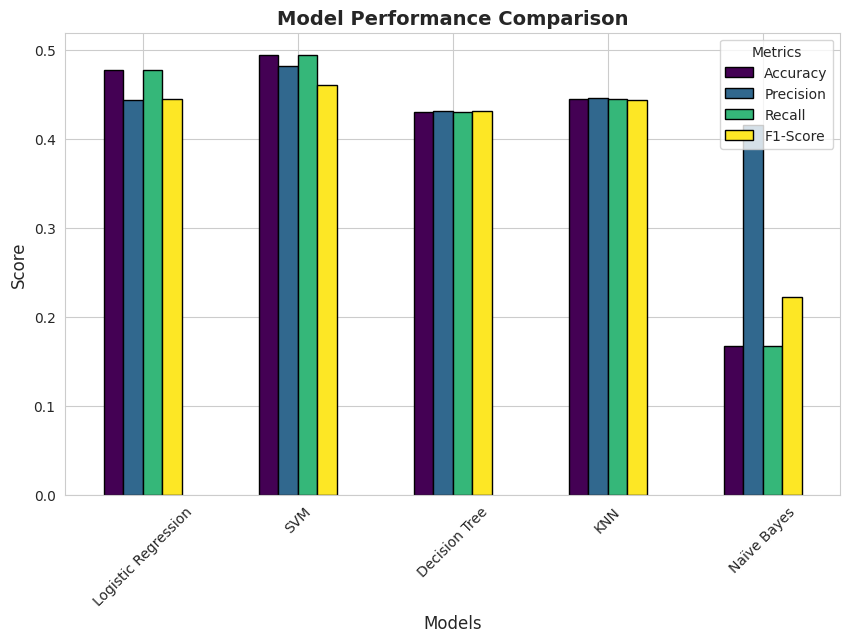

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 📌 Create an empty list to store model performance
performance_data = []

# ✅ Compute performance metrics for each model
for name, model in models_classification.items():
    y_pred = model.predict(X_test_selected)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results in the list
    performance_data.append([name, accuracy, precision, recall, f1])

# ✅ Convert list to DataFrame
df_performance = pd.DataFrame(performance_data, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

# 📌 Set plot style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# 📌 Plot bar chart
df_performance.set_index("Model").plot(kind="bar", figsize=(10, 6), colormap="viridis", edgecolor="black")

# ✅ Customize labels and title
plt.title("Model Performance Comparison", fontsize=14, fontweight="bold")
plt.xlabel("Models", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Metrics", loc="upper right")

# ✅ Show the plot
plt.show()


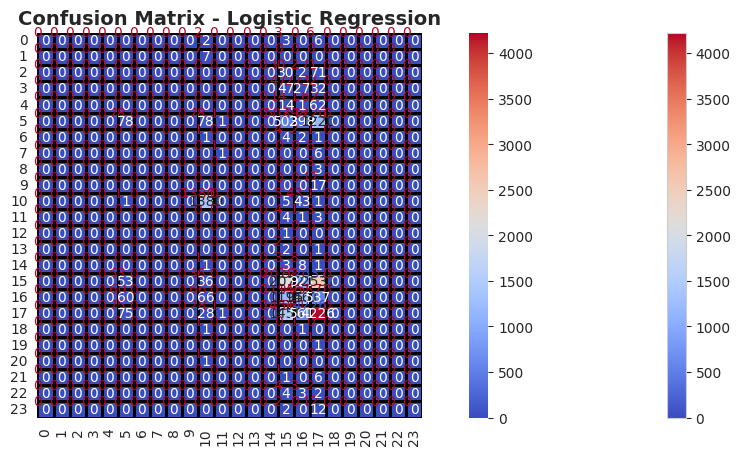

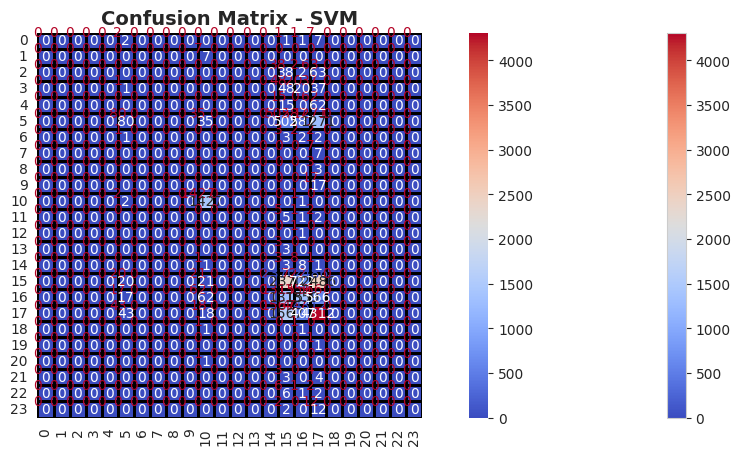

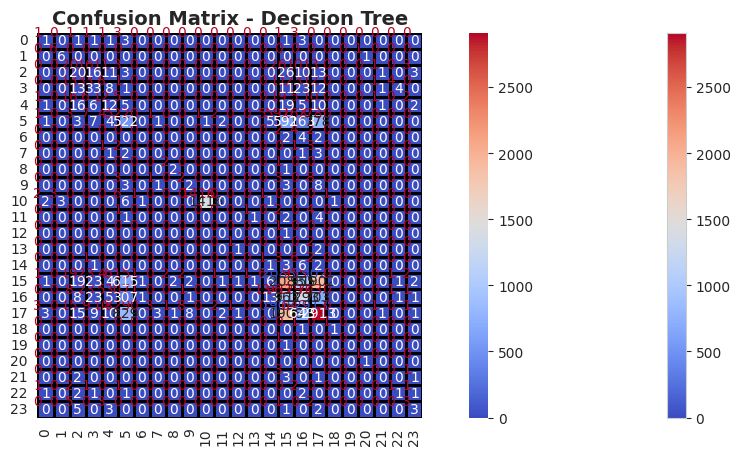

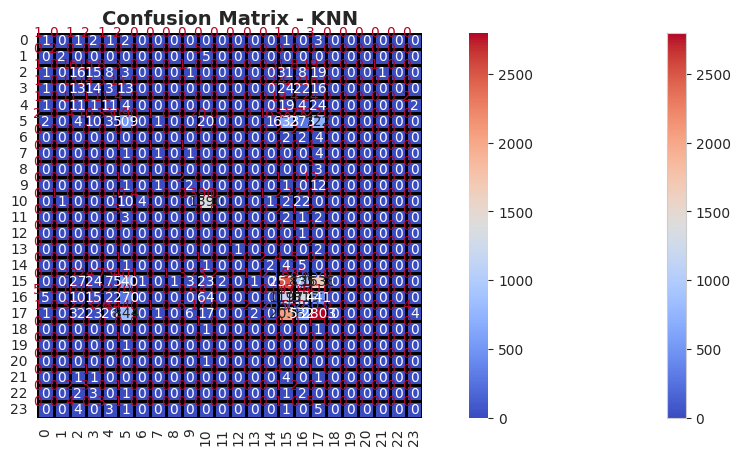

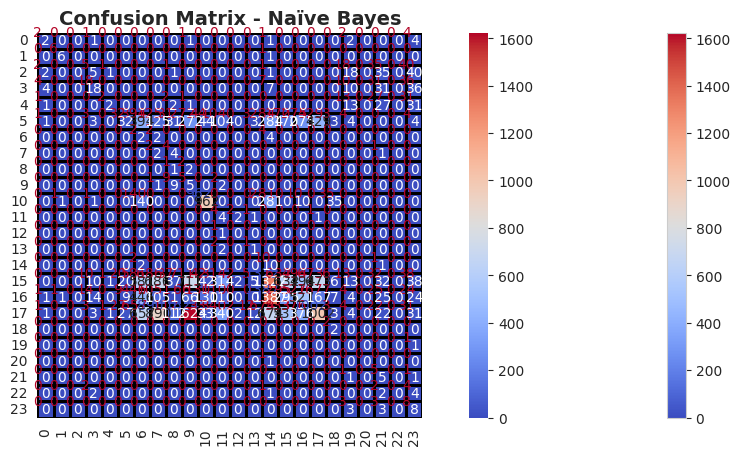

In [ ]:
# 📌 Function to plot the confusion matrix with figsize and custom colors
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Customize figure size and color scheme
    fig, ax = plt.subplots(figsize=(15, 5))  # Adjust figure size
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="coolwarm", ax=ax)  # Set custom colormap and axis
    sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=2, linecolor='black')

    plt.title(f"Confusion Matrix - {model_name}", fontsize=14, fontweight="bold")
    plt.show()

# ✅ Compute and display confusion matrices for each model
for name, model in models_classification.items():
    plot_confusion_matrix(model, X_test_selected, y_test, name)

Based on the performance metrics for all models, SVM is the best model.
Insights of performance values
1)SVM has the highest accuracy (49%) compared to other models.

2)SVM also has the highest Precision (48%) and Recall (49%)

3)F1-Score is almost identical for both SVM and KNN

4)logistic regression and Decision Tree is slightly behind SVM and KNN

5)Naïve Bayes performs the worst, with an accuracy of only 17 %.





In [ ]:
df.to_csv("final_updated_weather_dataset.csv", index=False)

In [ ]:
df=pd.read_csv("/content/final_updated_weather_dataset.csv")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Define target variable (change 'rating' to your actual target column)
target_column = "Summary"
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target

# Split dataset into 80% training/testing & 20% unseen data
X_train_test, X_unseen, y_train_test, y_unseen = train_test_split(X, y, test_size=0.2, random_state=42)

# Save unseen data to a new CSV file
unseen_data = pd.concat([X_unseen, y_unseen], axis=1)
unseen_data.to_csv("unseen_data_new.csv", index=False)

print("✅ Unseen data saved as 'unseen_data.csv'")

✅ Unseen data saved as 'unseen_data.csv'


#Hyper parameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

# ✅ Ensure X_train_selected is a DataFrame before training
X_train_selected = pd.DataFrame(X_train_selected, columns=selected_features)

# Define a hyperparameter grid for Logistic Regression
param_distributions = {
    'penalty': ['l1', 'l2', 'elasticnet', None],  # Regularization type
    'C': np.logspace(-4, 4, 10),  # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers that support L1 and ElasticNet
    'max_iter': [100, 200, 500]  # Maximum iterations for convergence
}

# Initialize Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# ✅ Use RandomizedSearchCV for faster hyperparameter tuning
random_search = RandomizedSearchCV(
    logreg_model, param_distributions=param_distributions, n_iter=10, cv=3,
    scoring='accuracy', n_jobs=-1, random_state=42
)

random_search.fit(X_train_selected, y_train_resampled)  # Train on the dataset

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Train final Logistic Regression model with best parameters on full dataset
best_logreg_model = random_search.best_estimator_
best_logreg_model.fit(X_train_selected, y_train_resampled)  # Train on full dataset for better accuracy

# Predict on test set
y_pred = best_logreg_model.predict(X_test_selected)

# Evaluate tuned Logistic Regression model
accuracy = accuracy_score(y_test, y_pred)
print(f"Tuned Logistic Regression Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args

Best Parameters: {'solver': 'saga', 'penalty': 'l1', 'max_iter': 500, 'C': 10000.0}
Tuned Logistic Regression Accuracy: 0.4782


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# 📊 **Model Performance Summary**

| Model                  | Accuracy  | Precision | Recall  | F1-Score |
|------------------------|-----------|------------|----------|-----------|
| Logistic Regression    | 0.4778    | 0.4443     | 0.4778   | 0.4447   |
| SVM                   | 0.4949    | 0.4823     | 0.4949   | 0.4611    |
| Decision Tree         | 0.4313    | 0.4324     | 0.4313   | 0.4318    |
| K-Nearest Neighbors   | 0.4449    | 0.4463    | 0.4449  | 0.4442    |
| Naïve Bayes          |  0.1671    | 0.4156     | 0.1671   | 0.2226    |

## 🔹 Best Model: **Support Vector Model(SVM)**
- **Highest Accuracy (49%)**
- **Best F1-score (46%)**
- **Good Precision and Recall balance**
- **All models except Naive Bayes have good F1-Score**


#**Limitations of the Dataset**

**High-Class Imbalance:**

If certain weather summaries occur more frequently, the model might be biased toward them.

**Feature Correlation Issues:**

Weather features are often correlated (e.g., humidity and temperature).
Some models (like Naïve Bayes) assume independence, leading to poor performance.

**Data Quality & Missing Values:**

If the dataset contains missing or noisy values, it can impact model performance.
Data imputation or outlier handling may improve accuracy.




#**Conclusion**

**Logistic Regression:** Balanced performance but struggles with precision and recall.

**SVM:** Best overall accuracy, slightly better precision and recall than Logistic Regression.

**Decision Tree**: Overfits the data, leading to lower accuracy and F1-score.

**K-Nearest Neighbors (KNN):** Moderate performance, but struggles with precision and recall.

**Naïve Bayes:** Performs the worst due to strong independence assumptions, leading to poor accuracy.




#**Best Model**

🏆 **Best Model: Support Vector Model(SVM)**
Based on the performance metrics, **SVM** is the best model as it has the **highest Accuracy (0.4949) and F1-Score (0.4611)**. The F1-Score is crucial as it balances Precision and Recall, making SVM the most reliable among all models.

In [ ]:
from sklearn.svm import SVC
from joblib import dump
import pandas as pd

# Load the training data
X_train_processed = pd.read_csv("final_updated_weather_dataset.csv")

# Define features and labels to train on
selected_features = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Precip Type_snow']
X_train = X_train_processed[selected_features]
y_train = X_train_processed['Precip Type_snow']

# Initialize the SVM model
svm_model = SVC(kernel='rbf', probability=True, random_state=42)  # Using RBF kernel for better performance

# Train the SVM model
svm_model.fit(X_train, y_train)

# Save the trained SVM model using joblib
dump(svm_model, "best_svm_model.joblib")

print("SVM Model saved successfully!")


SVM Model saved successfully!


In [ ]:
import pandas as pd
from joblib import load

# 🔹 1️⃣ Load Preprocessed Training Data
X_train_processed = pd.read_csv("final_updated_weather_dataset.csv")

# 🔹 2️⃣ Load Unseen Data
X_new = pd.read_csv("/content/unseen_data_new.csv")

# 🔹 3️⃣ Ensure Columns Match Training Data
X_new = X_new.reindex(columns=X_train_processed.columns, fill_value=0)  # Fills missing columns with 0

# 🔹 4️⃣ Select Only Required Features (Ensure Order Matches Training)
selected_features = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Precip Type_snow']
X_new_selected = X_new[selected_features]  # Keep only selected features

# 🔹 5️⃣ Load Trained SVM Model
svm_model = load("best_svm_model.joblib")

# 🔹 6️⃣ Make Predictions
y_pred = svm_model.predict(X_new_selected)

print("Predicted Class:", y_pred)


Predicted Class: [0 0 1 ... 0 0 0]


#🚀 **Final Conclusion**

SVM is the best performing model for this dataset.

Logstic regression,KNN and decision tree classifiers are all strong contenders.

Data issues like class imbalance & feature correlation could be affecting accuracy.

